In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
import pandas as pd

In [20]:
def quantize(data, n_bits):
    # 2 bits = 4 niveaux (00, 01, 10, 11)
    n_levels = 2**n_bits
    
    # Normaliser les données entre 0 et n_levels-1
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized = (data - min_vals) / (max_vals - min_vals) * (n_levels-1)
    
    # Quantifier en valeurs entières de 0 à n_levels-1
    quantized = np.round(normalized).astype(int)
    quantized = np.clip(quantized, 0, n_levels-1)
    
    return quantized

def export_data(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, header=False, index=False)
    print(f"Données exportées dans {filename}")

def process_dataset_from_sklearn(dataset_name, n_bits):
    if dataset_name == "iris":
        data = load_iris()
        output_file = f"data/iris_{n_bits}bits.csv"
    elif dataset_name == "wine":
        data = load_wine() 
        output_file = f"data/wine_{n_bits}bits.csv"
    else:
        raise ValueError("Dataset must be 'iris' or 'wine'")
    
    print(f"Dataset : {dataset_name}")
    print(f"Number of features: {data.data.shape[1]}")
    print(f"Number of classes: {len(np.unique(data.target))}")
    print("---")
    
    X = data.data
    X_quantized = quantize(X, n_bits)
    
    # Combine features and target into one array before exporting
    full_data = np.column_stack((X_quantized, data.target))
    export_data(full_data, output_file)



In [22]:

process_dataset_from_sklearn("iris", 2)

Dataset : iris
Number of features: 4
Number of classes: 3
---
Données exportées dans data/iris_2bits.csv


In [24]:
process_dataset_from_sklearn("wine", 4)

Dataset : wine
Number of features: 13
Number of classes: 3
---
Données exportées dans data/wine_4bits.csv


/var/folders/9l/j96wlyzs6yv10sd_s6lh6cr40000gn/T/ipykernel_90728/1078518708.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(depth, accuracy_HRF_wine, '^-', label="Accuracy PrivateDTs", color='black', linestyle="--")
/var/folders/9l/j96wlyzs6yv10sd_s6lh6cr40000gn/T/ipykernel_90728/1078518708.py:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(depth, accuracy_HRF_iris, '^-', label="Accuracy PrivateDTs", color='black', linestyle="--")


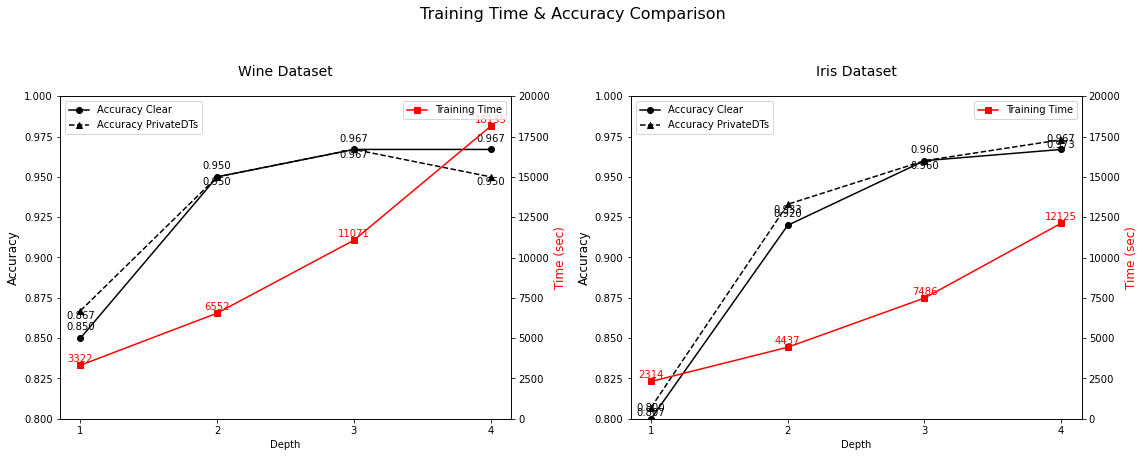

In [3]:
import matplotlib.pyplot as plt

# Données pour reproduire le graphique
depth = [1, 2, 3, 4]  # Profondeur
accuracy_clear_wine = [0.850, 0.950, 0.967, 0.967]
accuracy_private_wine = [0.867, 0.950, 0.967, 0.950]
training_time_wine = [3322, 6552, 11071, 18135]

accuracy_clear_iris = [0.800, 0.920, 0.960, 0.967]
accuracy_private_iris = [0.807, 0.933, 0.960, 0.973]
training_time_iris = [2314, 4437, 7486, 12125]

# Créer deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Premier graphique pour Wine
ax1_twin = ax1.twinx()
ax1.set_xlabel("Depth")
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.set_ylim(0.8, 1.0)
ax1.set_xticks(depth)
ax1.plot(depth, accuracy_clear_wine, 'o-', label="Accuracy Clear", color='black')
ax1.plot(depth, accuracy_private_wine, '^-', label="Accuracy PrivateDTs", color='black', linestyle="--")

# Ajouter les valeurs sur les points pour Wine
for i, txt in enumerate(accuracy_clear_wine):
    ax1.text(depth[i], accuracy_clear_wine[i] + 0.005, f"{txt:.3f}", ha='center')
for i, txt in enumerate(accuracy_private_wine):
    ax1.text(depth[i], accuracy_private_wine[i] - 0.005, f"{txt:.3f}", ha='center')

ax1_twin.set_ylabel("Time (sec)", fontsize=12, color="red")
ax1_twin.set_ylim(0, 20000)
ax1_twin.plot(depth, training_time_wine, 's-', color='red', label="Training Time")

# Ajouter les valeurs pour les temps (Wine)
for i, txt in enumerate(training_time_wine):
    ax1_twin.text(depth[i], training_time_wine[i] + 200, f"{txt}", color="red", ha='center')

# Deuxième graphique pour Iris
ax2_twin = ax2.twinx()
ax2.set_xlabel("Depth")
ax2.set_ylabel("Accuracy", fontsize=12)
ax2.set_ylim(0.8, 1.0)
ax2.set_xticks(depth)
ax2.plot(depth, accuracy_clear_iris, 'o-', label="Accuracy Clear", color='black')
ax2.plot(depth, accuracy_private_iris, '^-', label="Accuracy PrivateDTs", color='black', linestyle="--")

# Ajouter les valeurs sur les points pour Iris
for i, txt in enumerate(accuracy_clear_iris):
    ax2.text(depth[i], accuracy_clear_iris[i] + 0.005, f"{txt:.3f}", ha='center')
for i, txt in enumerate(accuracy_private_iris):
    ax2.text(depth[i], accuracy_private_iris[i] - 0.005, f"{txt:.3f}", ha='center')

ax2_twin.set_ylabel("Time (sec)", fontsize=12, color="red")
ax2_twin.set_ylim(0, 20000)
ax2_twin.plot(depth, training_time_iris, 's-', color='red', label="Training Time")

# Ajouter les valeurs pour les temps (Iris)
for i, txt in enumerate(training_time_iris):
    ax2_twin.text(depth[i], training_time_iris[i] + 200, f"{txt}", color="red", ha='center')

# Titres et légendes
ax1.set_title("Wine Dataset", fontsize=14, pad=20)
ax2.set_title("Iris Dataset", fontsize=14, pad=20)

ax1.legend(loc="upper left")
ax1_twin.legend(loc="upper right")
ax2.legend(loc="upper left")
ax2_twin.legend(loc="upper right")

fig.suptitle("Training Time & Accuracy Comparison", fontsize=16, y=1.05)
plt.tight_layout()

plt.show()